**Артамонов Кирилл, Б01-007**

Решение задачи XI.9.3(б):

$y'' - x\sqrt{y} = 0$ ,
$0 \leq x \leq 1$

$y(0) = 0$
$\int_0^1 y(x)dx = 1$

Параметром $\alpha$ будет выступать $\alpha = y'(0)$.

Импорт библиотек:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
h = 1e-4

def rk4(x_n, y_n, h, f): 
    f_1 = f(x_n, y_n)
    f_2 = f(x_n + h / 2, y_n + f_1 * h / 2)
    f_3 = f(x_n + h / 2, y_n + f_2 * h / 2)
    f_4 = f(x_n + h, y_n + f_3 * h)

    y_n1 = y_n + h / 6 * (f_1 + 2 * f_2 + 2 * f_3 + f_4)

    return y_n1

def get_Y_derivY(x, phaseVec):
    y = phaseVec[0][0]
    u = phaseVec[1][0]

    return np.array([[u], [x * np.sqrt(y)]])

def get_A_B(x, phaseVec):
    A = phaseVec[0][0]
    B = phaseVec[1][0]
    y = phaseVec[2][0]

    return np.array([[B], [x / 2 / np.sqrt(y) * A], [0]])

def iterateAlpha(alpha):
    F_a = -1
    F_a_prime = 0

    vec_Y_derivY = np.array([[0], [alpha]])
    vec_A_B_Y = np.array([[0], [1], [0.0001]])

    x_list   = [0]
    list_Y_derivY  = [vec_Y_derivY]
    list_A_B_Y = [vec_A_B_Y]

    for i in range(1, int(1/h)):
        x_list.append(i * h)

        next_vec_Y_derivY = rk4(x_list[i - 1], list_Y_derivY[i - 1], h, get_Y_derivY)
        list_Y_derivY.append(next_vec_Y_derivY)

        next_A_B_Y = rk4(x_list[i - 1], list_A_B_Y[i - 1], h, get_A_B)
        list_A_B_Y.append(next_A_B_Y)
        list_A_B_Y[i][2][0] = next_vec_Y_derivY[0][0].copy()

        F_a += next_vec_Y_derivY[0][0] * h
        F_a_prime += next_A_B_Y[0][0] * h

    return x_list, list_Y_derivY, F_a, F_a_prime


def shoot(init_alpha, epsilon):
    prev_alpha = init_alpha
    new_alpha = init_alpha
    F_a = -1

    while np.abs(F_a) > epsilon:
        x_list, list_Y_derivY, F_a, F_a_prime = iterateAlpha(new_alpha)

        new_alpha = prev_alpha - F_a / F_a_prime
        prev_alpha = new_alpha.copy()

    print(f' alpha = {new_alpha}')

    return x_list, list_Y_derivY, F_a

 alpha = 1.9291176846202034


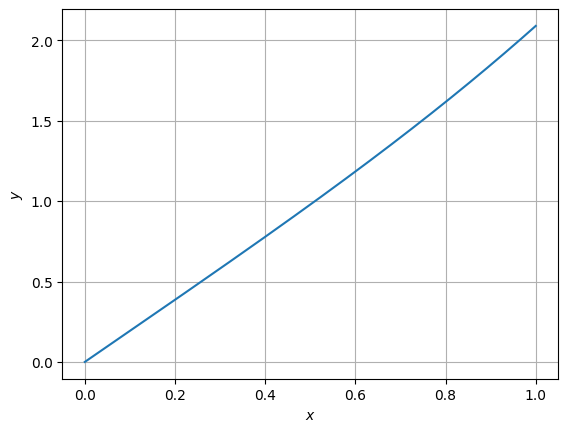

In [ ]:
x_list, list_Y_derivY, integral = shoot(2.0, 1e-6)
y_list = [list_Y_derivY[i][0][0] for i in range(0, len(list_Y_derivY))]

fig, ax = plt.subplots()
plt.plot(x_list, y_list)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()
